# Applied Machine Learning
## MiniProject 2: Classification of Textual Data

Author: Mustafa Javed 

Credits: Parts of this code has been given by Prof Rabbany and the teaching Staff during tutorials for COMP 551 with due permission to reuse the code

## Imports and Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

from scipy import sparse

from zipfile import ZipFile
import requests
import io
import time

##Task 1: Acquire, preprocess, and analyze the data

### 20news dataset

In [ ]:
twenty_train_dataset = fetch_20newsgroups(subset='train')
twenty_test_dataset = fetch_20newsgroups(subset='test')

In [ ]:
vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
tfidf_transformer = TfidfTransformer()
selector = VarianceThreshold(0.0005)

X_20_train = vectorizer.fit_transform(twenty_train_dataset.data)
Y_20_train = twenty_train_dataset.target

X_20_test = vectorizer.transform(twenty_test_dataset.data)
Y_20_test = twenty_test_dataset.target

X_20_train_count = selector.fit_transform(X_20_train)
X_20_test_count = selector.transform(X_20_test)

selector = VarianceThreshold(0.00005)
X_20_train_tfidf = selector.fit_transform(tfidf_transformer.fit_transform(X_20_train))
X_20_test_tfidf = selector.transform(tfidf_transformer.transform(X_20_test))

In [ ]:
print(X_20_train.shape)
print(Y_20_train.shape)
print(X_20_test.shape)
print(Y_20_test.shape)
print(X_20_train_count.shape)
print(X_20_test_count.shape)
print(X_20_train_tfidf.shape)
print(X_20_test_tfidf.shape)

(11314, 129796)
(11314,)
(7532, 129796)
(7532,)
(11314, 35065)
(7532, 35065)
(11314, 4321)
(7532, 4321)


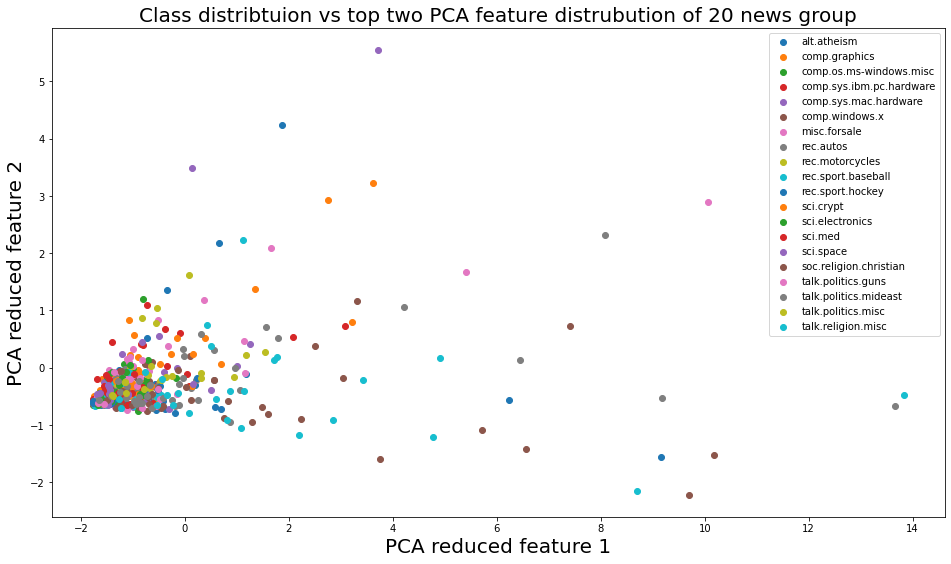

In [ ]:
pca = PCA(2)
X_20_train_pca = pca.fit_transform(X_20_train[500:1000,:].toarray())

plt.rcParams['figure.figsize'] = [16, 9]
plt.figure()

for i in range(np.max(Y_20_train) + 1):

  x_scatter = X_20_train_pca[Y_20_train[500:1000] == i,0]
  y_scatter = X_20_train_pca[Y_20_train[500:1000] == i,1]

  index = x_scatter<100
  x_scatter = x_scatter[index]
  y_scatter = y_scatter[index]

  index = y_scatter<100
  x_scatter = x_scatter[index]
  y_scatter = y_scatter[index]
  

  plt.scatter(x_scatter, y_scatter, label = twenty_train_dataset.target_names[i] ,marker='o', alpha=1)

plt.title("Class distribtuion vs top two PCA feature distrubution of 20 news group", fontsize=20)
plt.xlabel("PCA reduced feature 1", fontsize=20)
plt.ylabel("PCA reduced feature 2", fontsize=20)
plt.legend()
plt.show()


###140Sentiment Dataset

### WARNING: Colab might crash when vectorizing this dataset due to insufficient RAM. To aviod this, pass half of the dataset to Vectorizer

In [ ]:
req = requests.get('http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip')

with ZipFile(io.BytesIO(req.content)) as zipfile:
  zipfile.extractall()

Sentiment140_training = pd.read_csv('training.1600000.processed.noemoticon.csv', usecols = [0,5], encoding='latin-1')
Sentiment140_test = pd.read_csv('testdata.manual.2009.06.14.csv', usecols = [0,5])

Sentiment140_training.columns = ['Polarity', 'Text']
Sentiment140_test.columns = ['Polarity', 'Text']

Sentiment140_training_X,Sentiment140_training_Y = shuffle(Sentiment140_training.Text.to_numpy(),Sentiment140_training.Polarity.to_numpy())
Sentiment140_training_X, Sentiment140_training_Y = Sentiment140_training_X[:80000], Sentiment140_training_Y[:80000]

Sentiment140_training_Y[Sentiment140_training_Y == 4] = 1 #convert to binary classification

Sentiment140_test_X, Sentiment140_test_Y = Sentiment140_test.Text.to_numpy(), Sentiment140_test.Polarity.to_numpy()

Sentiment140_test_Y[Sentiment140_test_Y == 4] = 1 #convert to binary classification

In [ ]:
vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
selector = VarianceThreshold(0.00005)

X_140_train_unigram = vectorizer.fit_transform(Sentiment140_training_X)
X_140_test_unigram = vectorizer.transform(Sentiment140_test_X)

X_140_train_unigram = selector.fit_transform(X_140_train_unigram)
X_140_test_unigram = selector.transform(X_140_test_unigram)

selector = VarianceThreshold(0.00005)
vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1,2))

X_140_train_ngram = vectorizer.fit_transform(Sentiment140_training_X)
X_140_test_ngram = vectorizer.transform(Sentiment140_test_X)

X_140_train_ngram = selector.fit_transform(X_140_train_ngram)
X_140_test_ngram = selector.transform(X_140_test_ngram)


Y_140_train = Sentiment140_training_Y
Y_140_test = Sentiment140_test_Y

In [ ]:
print(X_140_train_unigram.shape)
print(X_140_test_unigram.shape)

print(X_140_train_ngram.shape)
print(X_140_test_ngram.shape)

print(Y_140_train.shape)
print(Y_140_test.shape)

(80000, 9592)
(497, 9592)
(80000, 16743)
(497, 16743)
(80000,)
(497,)


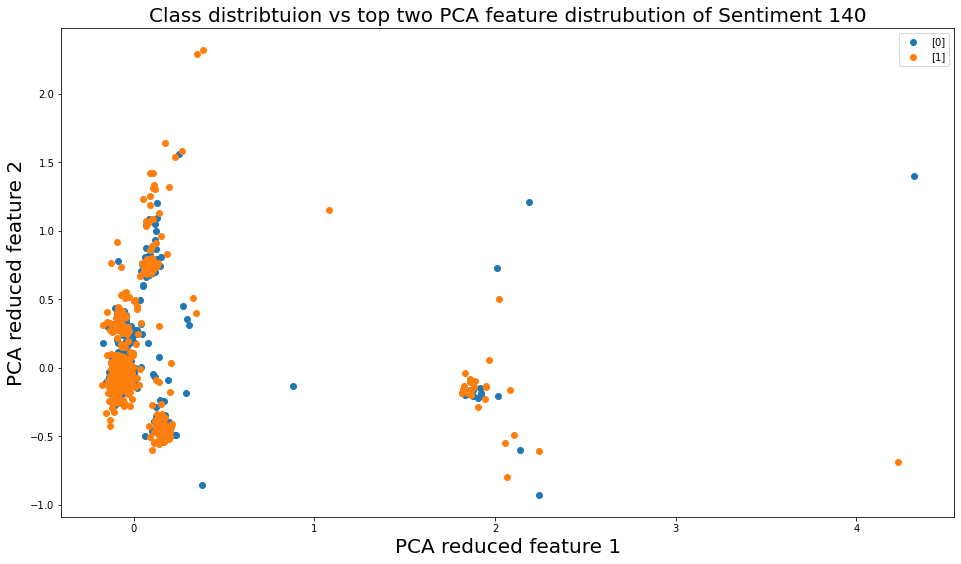

In [ ]:
pca = PCA(2)
vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
X_140_train = vectorizer.fit_transform(Sentiment140_training_X)
X_140_test = vectorizer.transform(Sentiment140_test_X)

X_140_train_pca = pca.fit_transform(X_140_train[:2000,:].toarray())

plt.rcParams['figure.figsize'] = [16, 9]
plt.figure()

for i in range(np.max(Y_140_train) + 1):

  x_scatter = X_140_train_pca[Y_140_train[:2000] == i,0]
  y_scatter = X_140_train_pca[Y_140_train[:2000] == i,1]

  plt.scatter(x_scatter, y_scatter, label = [i] ,marker='o', alpha=1)

plt.title("Class distribtuion vs top two PCA feature distrubution of Sentiment 140", fontsize=20)
plt.xlabel("PCA reduced feature 1", fontsize=20)
plt.ylabel("PCA reduced feature 2", fontsize=20)
plt.legend()
plt.show()


## Task 2: Implement Naive Bayes and k-fold cross validation

### Naive Bayes

In [ ]:
# Class that defines a Naive Bayes classifier
# The constructor takes one parameter type, which determines the feature probability distribution
# type = 'Gaussian', 'Multinomial', default = Gaussian

class NaiveBayes:
  def __init__(self, type = 'Gaussian'):
    self.type = type
    return

# predict method takes a X and Y numpy array or a sparse matrix.
# The dimension of X are the N X D where N = number of train instances and D = number of features.
# The dimension of Y are the N X 1 where N = number of train instances.

  def fit(self, x, y):
    N, D = x.shape
    C = np.max(y) + 1
    if self.type == 'Gaussian':                     # feature distribtuion is Gaussian
      mu, sigma = np.zeros((C,D)), np.zeros((C,D))  # two parameters for each feature conditioned on each class
      Nc = np.zeros(C)                              # number of instances in class c
          
      for c in range(C):                            # for each class get the MLE for the mean and std
          x_c = x[y == c]                           #slice all the elements from class c
          Nc[c] = x_c.shape[0]                      #get number of elements of class c
          mu[c,:] = np.mean(x_c,0) + 1/Nc[c]        #mean of features of class c with laplace smoothing
          if isinstance(x, np.ndarray): 
            xc_2 = x_c**2
          elif sparse.issparse(x):
            xc_2 = x_c.power(2)
          sigma[c,:] = (1+xc_2.sum(axis = 0))/Nc[c] - mu[c,:]**2  #std of features of class c with laplace smoothing

      self.mu = mu                                  # C x D
      self.sigma = sigma                            # C x D
      self.prior = (Nc+1)/(N+C)                        #Laplace smoothing
      return self
    
    elif self.type == 'Multinomial':    
      theta = np.zeros((C,D))                     # one parameter for each feature conditioned on each class
      Nc = np.zeros(C)                            # number of instances in class c
  
      for c in range(C):                                # for each class get the MLE for the theta
        x_c = x[y == c]                                    # slice all the elements from class c
        Nc[c] = x_c.shape[0]                                # get number of elements of class c
        theta[c,:] = (1+np.sum(x_c,0))/(Nc[c]+np.sum(x_c))  # counts of word d in all documents labelled c / total word count in all documents labelled c + laplace smoothing

      self.theta = theta                            # C x D
      self.prior = (Nc+1)/(N+C)                     # Laplace smoothing
      return self
    else:
      print("Feature distribtuion must be Gaussian or Multinomial")

  def logsumexp(self,Z):                                           # dimension C x N
      Zmax = np.max(Z,axis=0)[None,:]                              # max over C
      log_sum_exp = Zmax + np.log(np.sum(np.exp(Z - Zmax), axis=0))
      return log_sum_exp

# predict method takes a X numpy array or a sparse matrix
# The dimension of X are the N X D where N = number of test instances and D = number of features
# The number of test featue must match the number of features used to train the model 
# batching is used if the memory is constrained, will take longer to process
# return prediction probablities for each class for each instance
  def predict(self, xt, n_batchs = 20):
    Nt, D = xt.shape
    log_prior = np.log(self.prior)[:, None]

    if n_batchs != 0:                                     #break xt in batches to avoid RAM overflow
      splits = np.array_split(np.arange(Nt), n_batchs)        
      posterior = np.zeros(( self.prior.shape[0], xt.shape[0]) )

      if self.type == 'Gaussian':
        for split in splits:              # run predictions over all batches of xt
          if isinstance(xt, np.ndarray):
            batch = xt[split,:]
          elif sparse.issparse(xt):
            batch = xt[split,:].toarray()
          log_likelihood =-.5 * np.log(2*np.pi) - np.log(self.sigma[:,None,:]) -.5 * (((batch[None,:,:] - self.mu[:,None,:])/self.sigma[:,None,:])**2)  #C x N x D       
          log_likelihood = np.sum(log_likelihood, axis=2) # sum over the feature dimension to get a C x N matrix       
          log_posterior = log_prior + log_likelihood   # posterior calculation
          posterior[:,split] = np.exp(log_posterior - self.logsumexp(log_posterior))
        return posterior.T                                                  # dimension N x C
    
      elif self.type == 'Multinomial':      
        for split in splits:              # run predictions over all batches of xt
          if isinstance(xt, np.ndarray):
            batch = xt[split,:]
          elif sparse.issparse(xt):
            batch = xt[split,:].toarray()
          log_likelihood =  batch[None,:,:]*np.log(self.theta[:,None,:])                    # batch = 1 x B x D; theta = C x 1 x D ; likehood = C x B x D
          log_likelihood = np.sum(log_likelihood, axis=2)                                   # likehood = C x B
          log_posterior = log_prior + log_likelihood                                        # CxB
          posterior[:,split] = (np.exp(log_posterior - self.logsumexp(log_posterior)))      
        return posterior.T                                                               # dimension N x C
    else:
      if self.type == 'Gaussian':
        if sparse.issparse(xt):
          xt = xt.toarray()
        log_likelihood =-.5 * np.log(2*np.pi) - np.log(self.sigma[:,None,:]) -.5 * (((xt[None,:,:] - self.mu[:,None,:])/self.sigma[:,None,:])**2)  #C x N x D       
        log_likelihood = np.sum(log_likelihood, axis=2) # sum over the feature dimension to get a C x N matrix       
        log_posterior = log_prior + log_likelihood   # posterior calculation
        posterior = np.exp(log_posterior - self.logsumexp(log_posterior))
        return posterior.T                                                  # dimension N x C
    
      elif self.type == 'Multinomial':
        if sparse.issparse(xt):
          xt = xt.toarray()
        log_likelihood =  xt[None,:,:]*np.log(self.theta[:,None,:])                    # xt = 1 x N x D; theta = C x 1 x D ; likehood = C x N x D
        log_likelihood = np.sum(log_likelihood, axis=2)                                   # likehood = C x N
        log_posterior = log_prior + log_likelihood                                        # CxN
        posterior = (np.exp(log_posterior - self.logsumexp(log_posterior)))      
      return posterior.T                                                               # dimension N x C


 
def evaluate_acc(y_pred, y_test):
  assert len(y_pred) == len(y_test), "target and true labels must have equal len"
  return np.sum(y_pred == y_test)/y_pred.shape[0]

### K-fold cross validation
- Define a cross_validation_split function, which takes training data as input and splits it into k folds. Each fold is then used once as validation while the k − 1 remaining folds form the training set. (You may shuffle the data before splitting)
- Define function kfoldCV, which takes train/validation sets generated above and a given model as input. The function iterate through each train/validation set and returns the average result of each fold.
- Repeat functions above to the given model with different hyper-parameter settings, select the best hyperparameter by the best average k-fold result.

In [ ]:
# This method return a list of dict for each split e.g. for a 5 fold split
# the method would return [split1:dict, split2:dict, split3:dict, split4:dict, split5:dict]
# each dict would have 4 key-value pair
# where key represent the datasplit type i.e. X_train, Y_train, X_val, Y_val
# and key is the matrix with the respective data.
# The dataset is shuffled before creating splits
def cross_validation_split(X, Y, K):
  X,Y = shuffle(X,Y)
  N,D = X.shape
  assert N >= K, "training data size should be greater than or euqal to K"
  indices = np.arange(N)
  index_splits =  np.array_split(indices, K)
  splits = []
  for k in range(K):
    split = {}
    index_val = index_splits[k]
    index_train = np.setdiff1d(indices, index_val, assume_unique=True)
    split['X_train'] = X[index_train,:]
    split['Y_train'] = Y[index_train]
    split['X_val'] = X[index_val,:]
    split['Y_val'] = Y[index_val]
    splits.append(split)
  return splits

# Run K fold cross validation on the model using the splits passed through splits parameter
# return a list of validation accuracy over each fold
def kfoldCV(splits , model):
  accuracies = []
  for split in splits:
    model.fit(split['X_train'], split['Y_train'] )
    y_prob = model.predict(split['X_val'])
    if (y_prob.ndim == 1):
      y_pred = y_prob
    elif (y_prob.ndim == 2):
      y_pred = np.argmax(y_prob, 1)
    accuracies.append(evaluate_acc(y_pred,split['Y_val']))
  return np.array(accuracies)

## Task 3: Run experiments

#### News20group Dataset <br>


In [ ]:
count_splits = cross_validation_split(X = X_20_train_count, Y = Y_20_train, K = 5) # create cross-validation splits that will be used to select best models
tfidf_splits = cross_validation_split(X = X_20_train_tfidf, Y = Y_20_train, K = 5) # create cross-validation splits that will be used to select best models

##### Finding the best hyperparameter for Naive Bayes using cross validation:

- Naive Bayes assuming Multinomial feature distribution and count features
- Naive Bayes assuming Gaussian feature distribution and count features
- Naive Bayes assuming Multinomial feature distribution and tfidf features
- Naive Bayes assuming Gaussian feature distribution and tfidf features

0.8584 average accuracy with a standard deviation of 0.0051


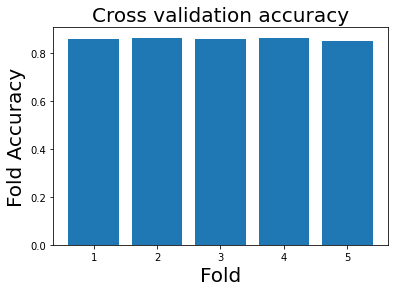

0.7911 average accuracy with a standard deviation of 0.0081


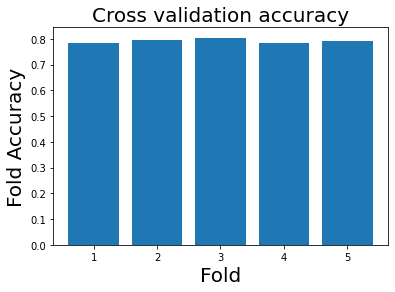

0.8434 average accuracy with a standard deviation of 0.0083


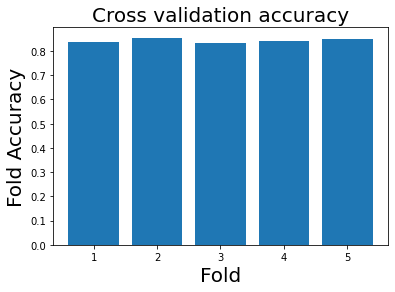

0.1400 average accuracy with a standard deviation of 0.0213


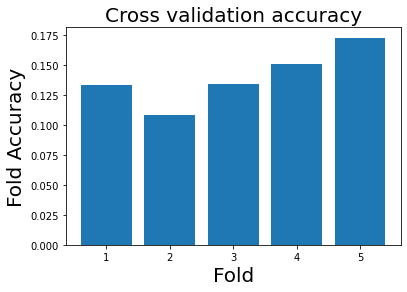

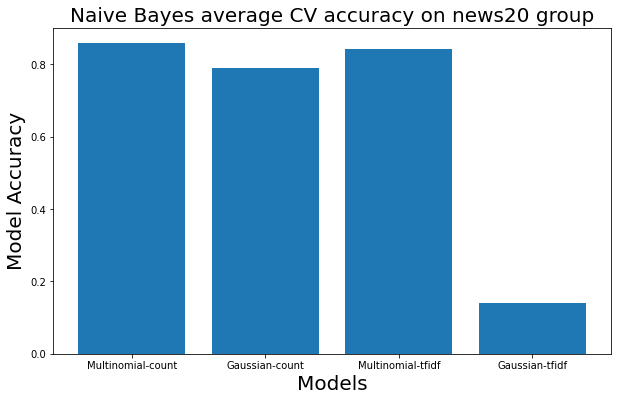

In [ ]:
models = ['Multinomial-count', 'Gaussian-count', 'Multinomial-tfidf', 'Gaussian-tfidf']
models_accuracies = []

NB_model = NaiveBayes('Multinomial')
accuracies = kfoldCV(count_splits , NB_model)
print("%0.4f average accuracy with a standard deviation of %0.4f" % (accuracies.mean(), accuracies.std()))
models_accuracies.append(accuracies.mean())

plt.rcParams['figure.figsize'] = [6, 4]
plt.figure()
plt.bar(list(range(1,len(accuracies)+1)),accuracies)
plt.title("Cross validation accuracy", fontsize=20)
plt.xlabel("Fold", fontsize=20)
plt.ylabel("Fold Accuracy", fontsize=20)
plt.show()

NB_model = NaiveBayes('Gaussian')
accuracies = kfoldCV(count_splits , NB_model)
print("%0.4f average accuracy with a standard deviation of %0.4f" % (accuracies.mean(), accuracies.std()))
models_accuracies.append(accuracies.mean())
plt.figure()
plt.bar(list(range(1,len(accuracies)+1)),accuracies)
plt.title("Cross validation accuracy", fontsize=20)
plt.xlabel("Fold", fontsize=20)
plt.ylabel("Fold Accuracy", fontsize=20)
plt.show()

NB_model = NaiveBayes('Multinomial')
accuracies = kfoldCV(tfidf_splits , NB_model)
print("%0.4f average accuracy with a standard deviation of %0.4f" % (accuracies.mean(), accuracies.std()))
models_accuracies.append(accuracies.mean())
plt.figure()
plt.bar(list(range(1,len(accuracies)+1)),accuracies)
plt.title("Cross validation accuracy", fontsize=20)
plt.xlabel("Fold", fontsize=20)
plt.ylabel("Fold Accuracy", fontsize=20)
plt.show()

NB_model = NaiveBayes('Gaussian')
accuracies = kfoldCV(tfidf_splits , NB_model)
print("%0.4f average accuracy with a standard deviation of %0.4f" % (accuracies.mean(), accuracies.std()))
models_accuracies.append(accuracies.mean())
plt.figure()
plt.bar(list(range(1,len(accuracies)+1)),accuracies)
plt.title("Cross validation accuracy", fontsize=20)
plt.xlabel("Fold", fontsize=20)
plt.ylabel("Fold Accuracy", fontsize=20)
plt.show()

plt.rcParams['figure.figsize'] = [10, 6]
plt.figure()
plt.bar(models,models_accuracies)
plt.title("Naive Bayes average CV accuracy on news20 group", fontsize=20)
plt.xlabel("Models", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.show()

##### Finding the best hyperparameter for Softmax using cross validation:

Number of Iterations

/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

0.87 average accuracy with a standard deviation of 0.00 for 10 max iterations


/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

0.89 average accuracy with a standard deviation of 0.01 for 30 max iterations


/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

0.89 average accuracy with a standard deviation of 0.01 for 50 max iterations


/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

0.89 average accuracy with a standard deviation of 0.01 for 70 max iterations


/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

0.89 average accuracy with a standard deviation of 0.01 for 90 max iterations


/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


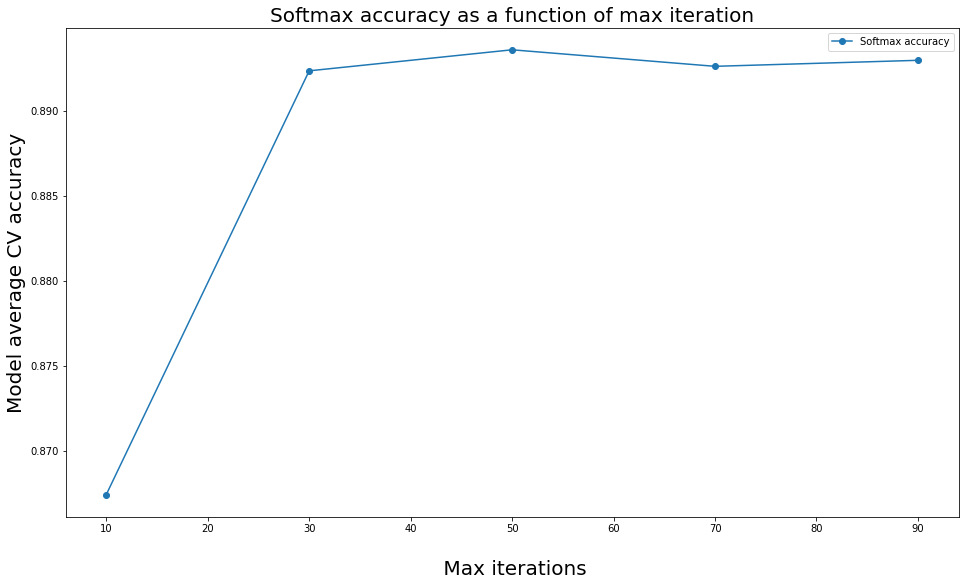

In [ ]:
average_CV_accuracies = []
max_iters = list(range(10,100,20))
for max_iteration in max_iters:
  logisticRegr = LogisticRegression(max_iter=max_iteration)

  accuracies = kfoldCV(count_splits , logisticRegr)
  print("%0.2f average accuracy with a standard deviation of %0.2f for %d max iterations" % (accuracies.mean(), accuracies.std(), max_iteration))
  average_CV_accuracies.append(accuracies.mean())

plt.rcParams['figure.figsize'] = [16, 9]
plt.figure()
plt.plot(max_iters, average_CV_accuracies, label = 'Softmax accuracy', marker='o')
plt.title("Softmax accuracy as a function of max iteration", fontsize=20)
plt.xlabel(" \n Max iterations", fontsize=20)
plt.ylabel("Model average CV accuracy", fontsize=20)
plt.legend(loc='upper right')
plt.show()

Regularization Strength

0.10 average accuracy with a standard deviation of 0.06 with regularization 0.00 
0.52 average accuracy with a standard deviation of 0.04 with regularization 0.01 
0.78 average accuracy with a standard deviation of 0.01 with regularization 0.10 
0.87 average accuracy with a standard deviation of 0.01 with regularization 0.50 
0.89 average accuracy with a standard deviation of 0.01 with regularization 1.00 


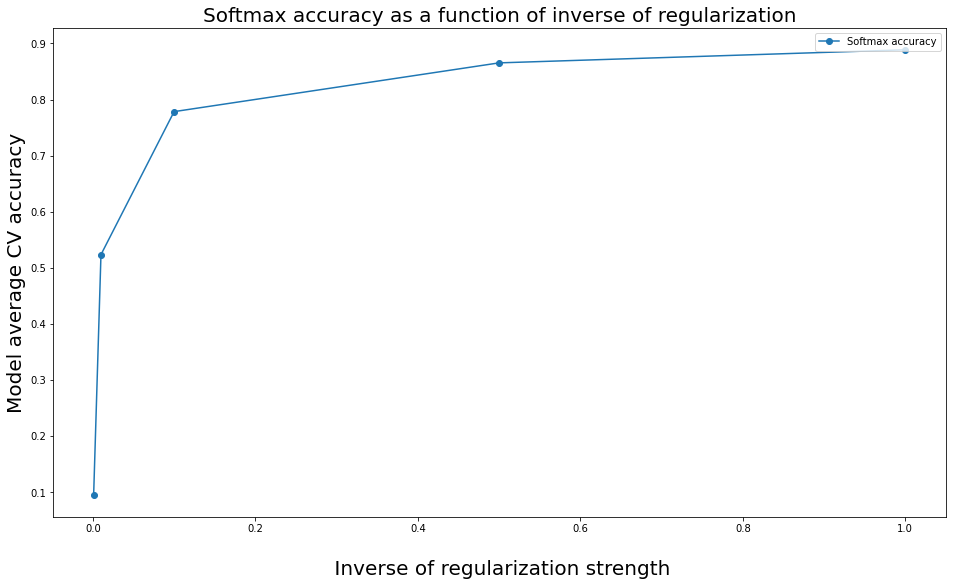

In [ ]:
regularization_strength = [0.001, 0.01, 0.1, 0.5, 1.0]
average_CV_accuracies = []

for C in regularization_strength:
  logisticRegr = LogisticRegression(C = C)

  accuracies = kfoldCV(count_splits , logisticRegr)
  print("%0.2f average accuracy with a standard deviation of %0.2f with regularization %0.2f " % (accuracies.mean(), accuracies.std(), C))
  average_CV_accuracies.append(accuracies.mean())

plt.rcParams['figure.figsize'] = [16, 9]
plt.figure()
plt.plot(regularization_strength, average_CV_accuracies, label = 'Softmax accuracy', marker='o')
plt.title("Softmax accuracy as a function of inverse of regularization", fontsize=20)
plt.xlabel(" \n Inverse of regularization strength", fontsize=20)
plt.ylabel("Model average CV accuracy", fontsize=20)
plt.legend(loc='upper right')
plt.show()

solver= ‘newton-cg’ ,‘lbfgs’ ,‘liblinear’, ‘sag’ , ‘saga’

In [ ]:
solvers = [ 'liblinear','lbfgs', 'sag', 'saga']
average_CV_accuracies = []

for solver in solvers:
  logisticRegr = LogisticRegression(max_iter=50, solver = solver)

  accuracies = kfoldCV(count_splits, logisticRegr)
  print("%0.2f average accuracy with a standard deviation of %0.2f with solver %s" % (accuracies.mean(), accuracies.std(),solver))
  average_CV_accuracies.append(accuracies.mean())



0.90 average accuracy with a standard deviation of 0.01 with solver liblinear


/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

0.89 average accuracy with a standard deviation of 0.01 with solver lbfgs


/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/2021/mjaved4/Desktop/comp551/venv/lib/pyth

0.56 average accuracy with a standard deviation of 0.01 with solver sag


/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.56 average accuracy with a standard deviation of 0.01 with solver saga


/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


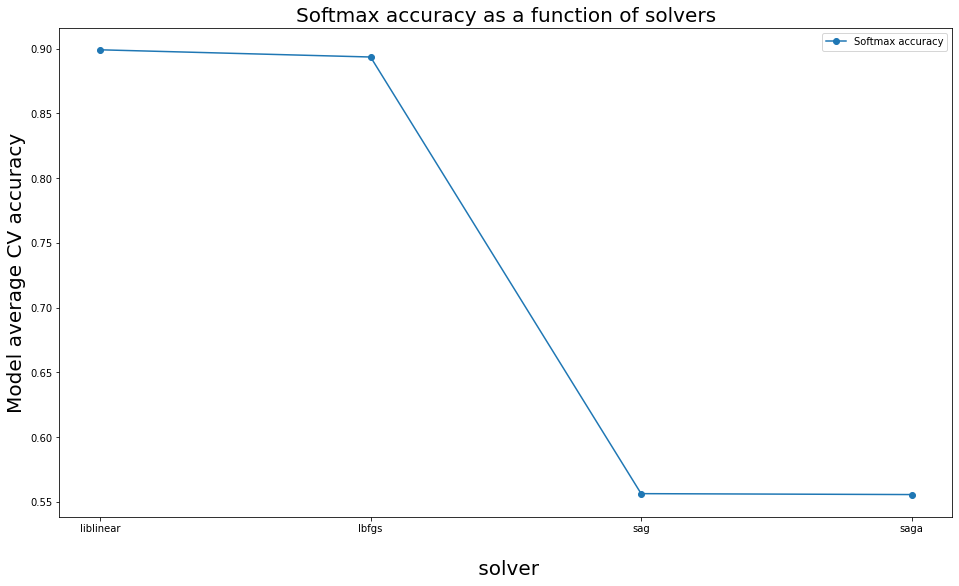

In [ ]:
plt.rcParams['figure.figsize'] = [16, 9]
plt.figure()
plt.plot(solvers, average_CV_accuracies, label = 'Softmax accuracy', marker='o')
plt.title("Softmax accuracy as a function of solvers", fontsize=20)
plt.xlabel(" \n solver", fontsize=20)
plt.ylabel("Model average CV accuracy", fontsize=20)
plt.legend(loc='upper right')
plt.show()

#### Sentiment 140 Dataset <br>



- Naive Bayes assuming Multinomial feature distribution and unigram features
- Naive Bayes assuming Gaussian feature distribution and unigram features
- Naive Bayes assuming Multinomial feature distribution and ngram features
- Naive Bayes assuming Gaussian feature distribution and ngram features

In [ ]:
unigram_splits = cross_validation_split(X = X_140_train_unigram, Y = Y_140_train, K = 5) # create cross-validation splits that will be used to select best models
ngram_splits = cross_validation_split(X = X_140_train_ngram, Y = Y_140_train, K = 5) # create cross-validation splits that will be used to select best models

0.7461 average accuracy with a standard deviation of 0.0025


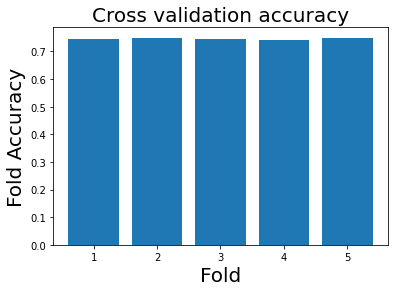

0.6497 average accuracy with a standard deviation of 0.0031


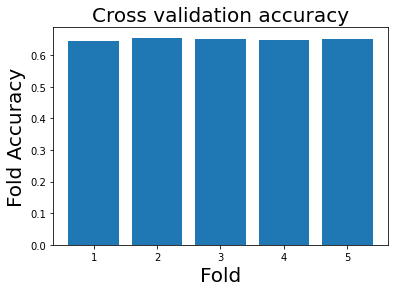

0.7478 average accuracy with a standard deviation of 0.0024


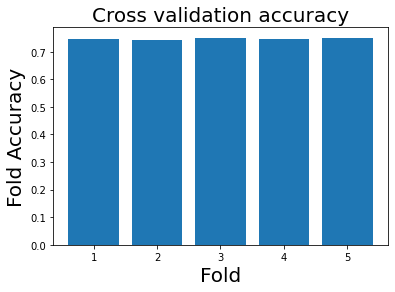

0.6728 average accuracy with a standard deviation of 0.0031


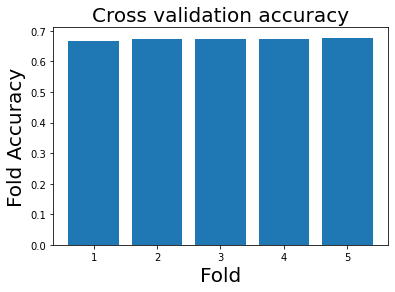

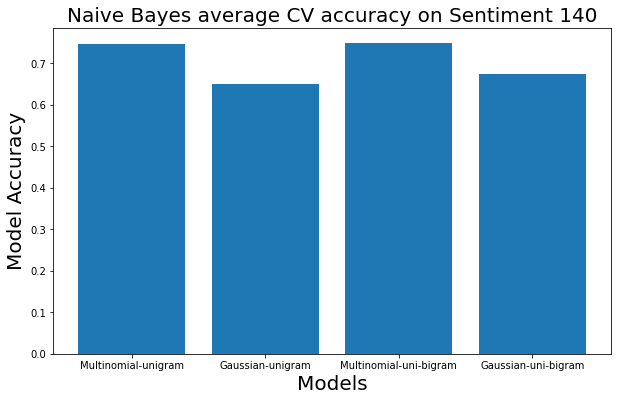

In [ ]:
models = ['Multinomial-unigram', 'Gaussian-unigram', 'Multinomial-uni-bigram', 'Gaussian-uni-bigram']
models_accuracies = []

NB_model = NaiveBayes('Multinomial')
accuracies = kfoldCV(unigram_splits , NB_model)
print("%0.4f average accuracy with a standard deviation of %0.4f" % (accuracies.mean(), accuracies.std()))
models_accuracies.append(accuracies.mean())
plt.rcParams['figure.figsize'] = [6, 4]
plt.figure()
plt.bar(list(range(1,len(accuracies)+1)),accuracies)
plt.title("Cross validation accuracy", fontsize=20)
plt.xlabel("Fold", fontsize=20)
plt.ylabel("Fold Accuracy", fontsize=20)
plt.show()

NB_model = NaiveBayes('Gaussian')
accuracies = kfoldCV(unigram_splits , NB_model)
print("%0.4f average accuracy with a standard deviation of %0.4f" % (accuracies.mean(), accuracies.std()))
models_accuracies.append(accuracies.mean())
plt.figure()
plt.bar(list(range(1,len(accuracies)+1)),accuracies)
plt.title("Cross validation accuracy", fontsize=20)
plt.xlabel("Fold", fontsize=20)
plt.ylabel("Fold Accuracy", fontsize=20)
plt.show()

NB_model = NaiveBayes('Multinomial')
accuracies = kfoldCV(ngram_splits , NB_model)
print("%0.4f average accuracy with a standard deviation of %0.4f" % (accuracies.mean(), accuracies.std()))
models_accuracies.append(accuracies.mean())
plt.figure()
plt.bar(list(range(1,len(accuracies)+1)),accuracies)
plt.title("Cross validation accuracy", fontsize=20)
plt.xlabel("Fold", fontsize=20)
plt.ylabel("Fold Accuracy", fontsize=20)
plt.show()

NB_model = NaiveBayes('Gaussian')
accuracies = kfoldCV(ngram_splits , NB_model)
print("%0.4f average accuracy with a standard deviation of %0.4f" % (accuracies.mean(), accuracies.std()))
models_accuracies.append(accuracies.mean())
plt.figure()
plt.bar(list(range(1,len(accuracies)+1)),accuracies)
plt.title("Cross validation accuracy", fontsize=20)
plt.xlabel("Fold", fontsize=20)
plt.ylabel("Fold Accuracy", fontsize=20)
plt.show()

plt.rcParams['figure.figsize'] = [10, 6]
plt.figure()
plt.bar(models,models_accuracies)
plt.title("Naive Bayes average CV accuracy on Sentiment 140", fontsize=20)
plt.xlabel("Models", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.show()


#### Naive Bayes vs Softmax on New20group test

Naive Bayes test accuracy: 78.5980 %
Naive Bayes took: 9.02 seconds
Softmax test accuracy: 81.2135 %
Softmax took: 14.12 seconds


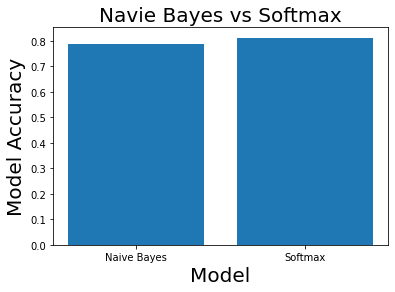

In [ ]:
NB_model = NaiveBayes('Multinomial')          
NB_start_time = time.time()
NB_model.fit(X_20_train_count, Y_20_train)
y_prob = NB_model.predict(X_20_test_count, n_batchs= 10)
NB_end_time = time.time()
y_pred = np.argmax(y_prob, 1)
accuracy_NB = evaluate_acc(y_pred,Y_20_test)
print(f'Naive Bayes test accuracy: {accuracy_NB*100 :.4f} %')
print(f'Naive Bayes took: {NB_end_time - NB_start_time:.2f} seconds')


logisticRegr = LogisticRegression(max_iter=50,C=1, solver = 'liblinear')
softmax_start_time = time.time()
logisticRegr.fit(X_20_train_count, Y_20_train)
y_pred = logisticRegr.predict(X_20_test_count)
softmax_end_time = time.time()
accuracy_SM = evaluate_acc(y_pred,Y_20_test)
print(f'Softmax test accuracy: {accuracy_SM*100 :.4f} %')
print(f'Softmax took: {softmax_end_time - softmax_start_time:.2f} seconds')

plt.rcParams['figure.figsize'] = [6, 4]
plt.figure()
plt.bar(["Naive Bayes", "Softmax"], [accuracy_NB, accuracy_SM])
plt.title("Navie Bayes vs Softmax", fontsize=20)
plt.xlabel("Model", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.show()

Further, with a plot, compare the accuracy of the two models as a function of the size of dataset (by controlling the training size). For example, you can randomly select 20%; 40%; 60% and 80% of the available training data and train your model on this subset. Now, compare the performance of corresponding models and highlight the best. Describe your findings.

In [ ]:
dataset_portions = [20, 30, 40, 50, 60, 70, 80]
NB_accuracies, Softmax_accuracies  = [], []
NB_durations, Softmax_durations  = [], []

NB_model = NaiveBayes('Multinomial')            #choose NB with the optimal HP
logisticRegr = LogisticRegression(max_iter=50,C=1, solver = 'liblinear') #choose Softmax with the optimal HP

for portion in dataset_portions:
  size = int(np.ceil(portion/100*X_20_train_count.shape[0]))
  
  NB_start_time = time.time()
  NB_model.fit(X_20_train_count[:size,:], Y_20_train[:size])
  y_prob = NB_model.predict(X_20_test_count)
  NB_end_time = time.time()
  y_pred = np.argmax(y_prob, 1)
  NB_accuracies.append(evaluate_acc(y_pred,Y_20_test))
  NB_durations.append(NB_end_time - NB_start_time)

  softmax_start_time = time.time()
  logisticRegr.fit(X_20_train_count[:size,:], Y_20_train[:size])
  y_pred = logisticRegr.predict(X_20_test_count)
  softmax_end_time = time.time()
  Softmax_accuracies.append(evaluate_acc(y_pred,Y_20_test)) 
  Softmax_durations.append(softmax_end_time - softmax_start_time)


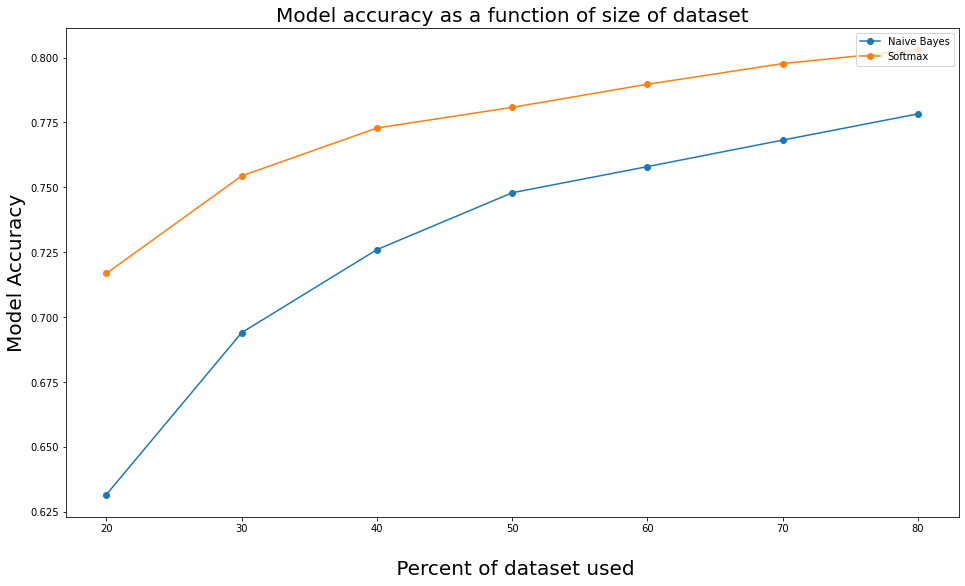

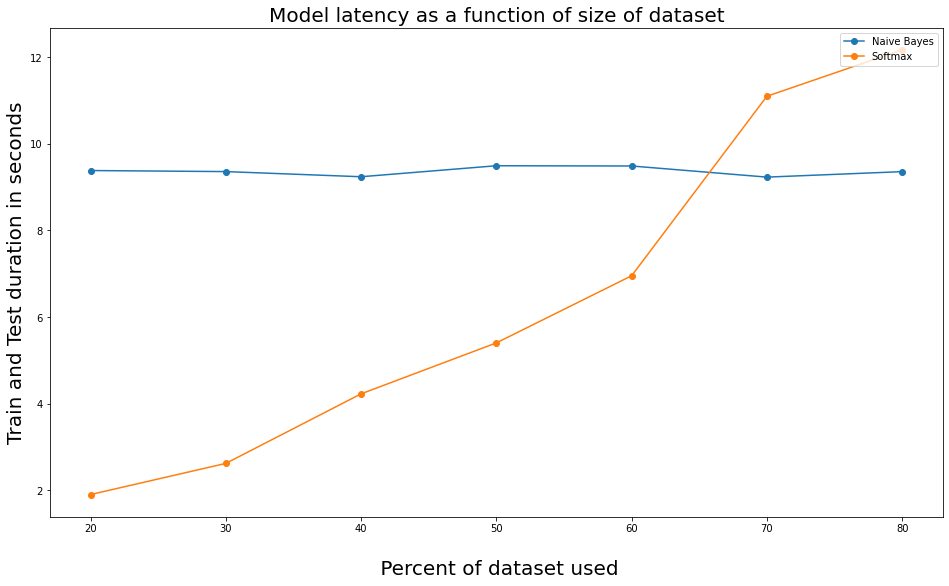

In [ ]:
plt.rcParams['figure.figsize'] = [16, 9]
plt.figure()
plt.plot(dataset_portions, NB_accuracies, label = 'Naive Bayes', marker='o')
plt.plot(dataset_portions, Softmax_accuracies, label = 'Softmax', marker='o')
plt.title("Model accuracy as a function of size of dataset", fontsize=20)
plt.xlabel(" \n Percent of dataset used", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.legend(loc='upper right')

plt.figure()
plt.plot(dataset_portions, NB_durations, label = 'Naive Bayes', marker='o')
plt.plot(dataset_portions, Softmax_durations, label = 'Softmax', marker='o')
plt.title("Model latency as a function of size of dataset", fontsize=20)
plt.xlabel(" \n Percent of dataset used", fontsize=20)
plt.ylabel("Train and Test duration in seconds", fontsize=20)
plt.legend(loc='upper right')

#### Naive Bayes vs Softmax on Sentiment140 test

Naive Bayes test accuracy: 56.5392 %
Naive Bayes took: 1.0959 seconds
Softmax test accuracy: 57.55 %
Softmax took: 1.51 seconds


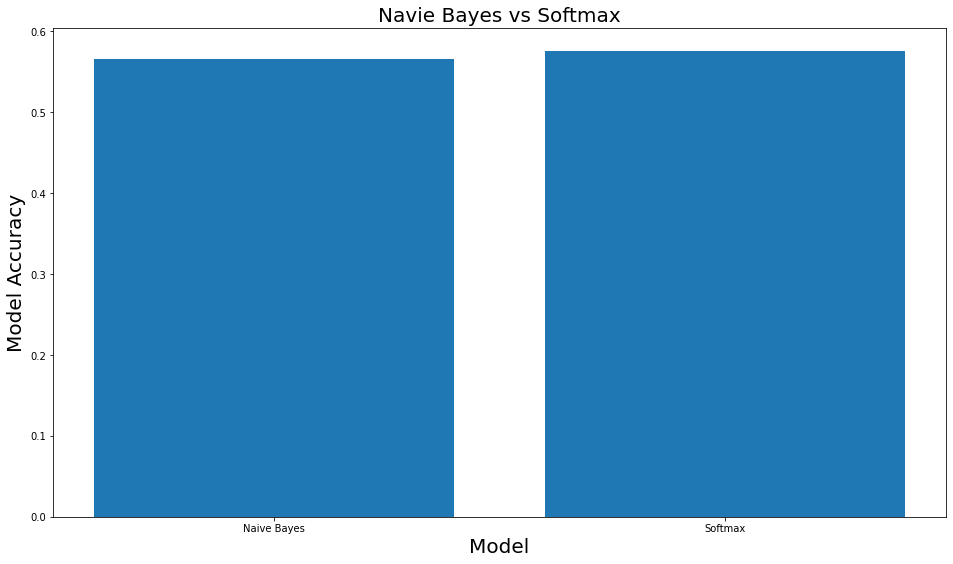

In [ ]:
NB_model = NaiveBayes('Multinomial')                       #choose NB with the optimal HP
NB_start_time = time.time()
NB_model.fit(X_140_train_ngram, Y_140_train)
y_prob = NB_model.predict(X_140_test_ngram)
NB_end_time = time.time()
y_pred = np.argmax(y_prob, 1)
accuracy_NB = evaluate_acc(y_pred,Y_140_test)
print(f'Naive Bayes test accuracy: {accuracy_NB*100 :.4f} %')
print(f'Naive Bayes took: {NB_end_time - NB_start_time:.4f} seconds')


logisticRegr = LogisticRegression(max_iter=50,C=1, solver = 'liblinear') #choose Softmax with the optimal HP
softmax_start_time = time.time()
logisticRegr.fit(X_140_train_ngram, Y_140_train)
y_pred = logisticRegr.predict(X_140_test_ngram)
softmax_end_time = time.time()
accuracy_SM = evaluate_acc(y_pred,Y_140_test)
print(f'Softmax test accuracy: {accuracy_SM*100 :.2f} %')
print(f'Softmax took: {softmax_end_time - softmax_start_time:.2f} seconds')

plt.rcParams['figure.figsize'] = [6, 4]
plt.figure()
plt.bar(["Naive Bayes", "Softmax"], [accuracy_NB, accuracy_SM])
plt.title("Navie Bayes vs Softmax", fontsize=20)
plt.xlabel("Model", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.show()

Further, with a plot, compare the accuracy of the two models as a function of the size of dataset (by controlling the training size). For example, you can randomly select 20%; 40%; 60% and 80% of the available training data and train your model on this subset. Now, compare the performance of corresponding models and highlight the best. Describe your findings.

In [ ]:
dataset_portions = [20, 30, 40, 50, 60, 70, 80]
NB_accuracies, Softmax_accuracies  = [], []
NB_durations, Softmax_durations  = [], []

NB_model = NaiveBayes('Multinomial')            #choose NB with the optimal HP
logisticRegr = LogisticRegression(max_iter=50,C=1, solver = 'liblinear') #choose Softmax with the optimal HP

for portion in dataset_portions:
  size = int(np.ceil(portion/100*X_140_train_ngram.shape[0]))
  
  NB_start_time = time.time()
  NB_model.fit(X_140_train_ngram[:size,:], Y_140_train[:size])
  y_prob = NB_model.predict(X_140_test_ngram)
  NB_end_time = time.time()
  y_pred = np.argmax(y_prob, 1)
  NB_accuracies.append(evaluate_acc(y_pred,Y_140_test))
  NB_durations.append(NB_end_time - NB_start_time)

  softmax_start_time = time.time()
  logisticRegr.fit(X_140_train_ngram[:size,:], Y_140_train[:size])
  y_pred = logisticRegr.predict(X_140_test_ngram)
  softmax_end_time = time.time()
  Softmax_accuracies.append(evaluate_acc(y_pred,Y_140_test)) 
  Softmax_durations.append(softmax_end_time - softmax_start_time)


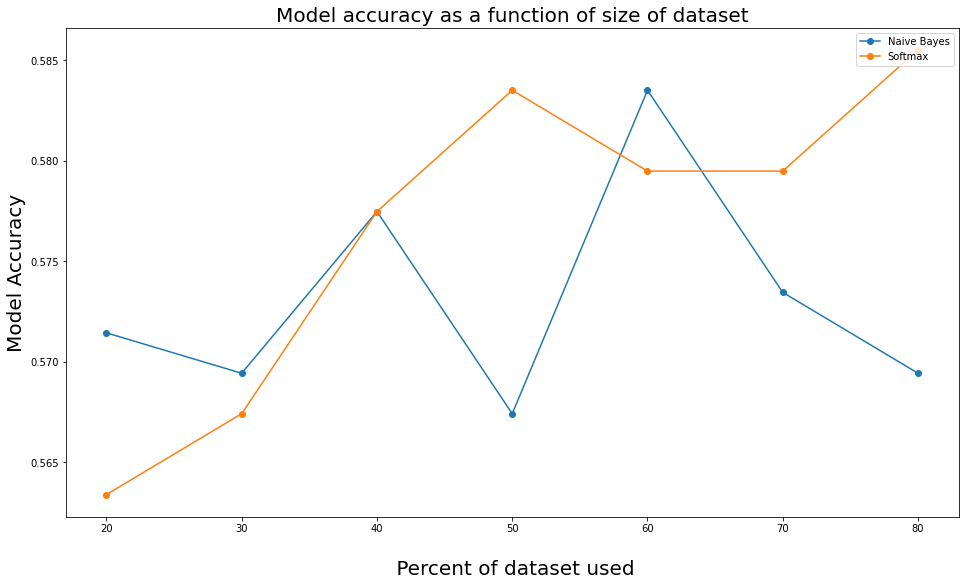

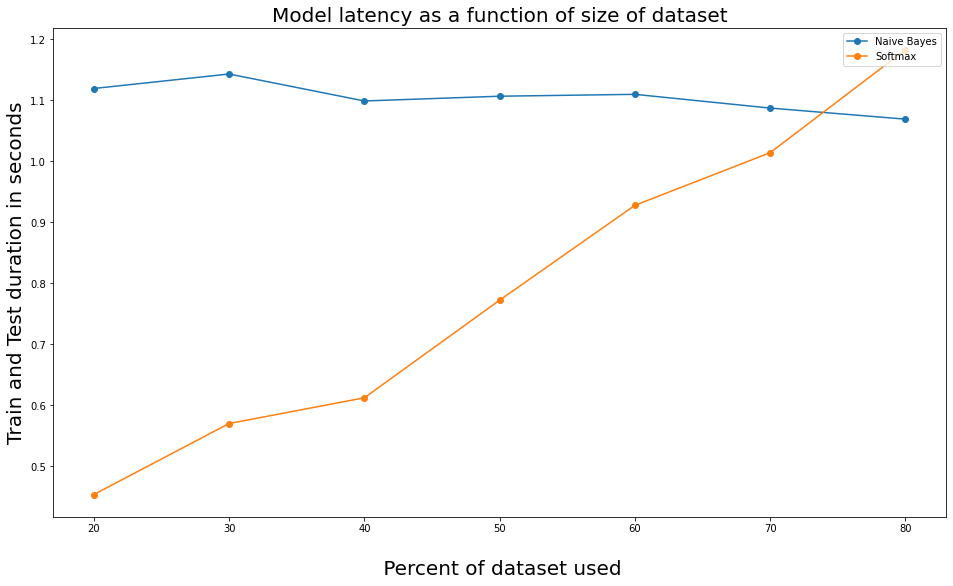

In [ ]:
plt.rcParams['figure.figsize'] = [16, 9]
plt.figure()
plt.plot(dataset_portions, NB_accuracies, label = 'Naive Bayes', marker='o')
plt.plot(dataset_portions, Softmax_accuracies, label = 'Softmax', marker='o')
plt.title("Model accuracy as a function of size of dataset", fontsize=20)
plt.xlabel(" \n Percent of dataset used", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.legend(loc='upper right')

plt.figure()
plt.plot(dataset_portions, NB_durations, label = 'Naive Bayes', marker='o')
plt.plot(dataset_portions, Softmax_durations, label = 'Softmax', marker='o')
plt.title("Model latency as a function of size of dataset", fontsize=20)
plt.xlabel(" \n Percent of dataset used", fontsize=20)
plt.ylabel("Train and Test duration in seconds", fontsize=20)
plt.legend(loc='upper right')


### Above and Beyond
For this part, you might implement softmax regression from scratch (and try different learning rates, investigate different stopping criteria for the gradient descent), try different text embedding methods as alternatives to bag of words. You are also welcome and encouraged to try any other model covered in the class, and you are free to implement them yourself or use any Python library that has their implementation, e.g. the from the scikit-learn package. Of course, you do not need to do all of these things, but look at them as suggestions and try to demonstrate curiosity, creativity, rigour, and an understanding of the course material in how you run your chosen experiments and how you report on them in your write-up.

#### Further Data processing to remove sparse features from the training data

In [ ]:
NB_accuracies, Softmax_accuracies  = [], []
NB_durations, Softmax_durations  = [], []

NB_model = NaiveBayes('Multinomial')            #choose NB with the optimal HP
logisticRegr = LogisticRegression(max_iter=50, C=1, solver = 'liblinear') #choose Softmax with the optimal HP
remove_feature_below = list(range(0,10))

for i in remove_feature_below:                                         
  indices = (X_20_train.sum(axis=0) > i).nonzero()[1]  #remove feature columns that have a sum < i
  
  NB_start_time = time.time()
  NB_model.fit(X_20_train[:,indices], Y_20_train)
  y_prob = NB_model.predict(X_20_test[:,indices])
  NB_end_time = time.time()
  y_pred = np.argmax(y_prob, 1)
  NB_accuracies.append(evaluate_acc(y_pred,Y_20_test))
  NB_durations.append(NB_end_time - NB_start_time)

  softmax_start_time = time.time()
  logisticRegr.fit(X_20_train[:,indices], Y_20_train)
  y_pred = logisticRegr.predict(X_20_test[:,indices])
  softmax_end_time = time.time()
  Softmax_accuracies.append(evaluate_acc(y_pred,Y_20_test))
  Softmax_durations.append(softmax_end_time - softmax_start_time)


/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


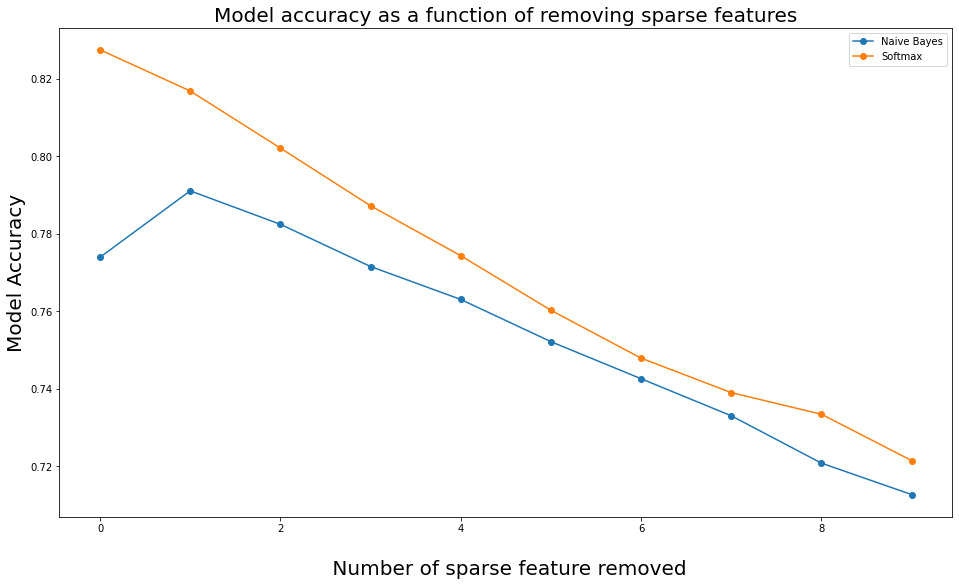

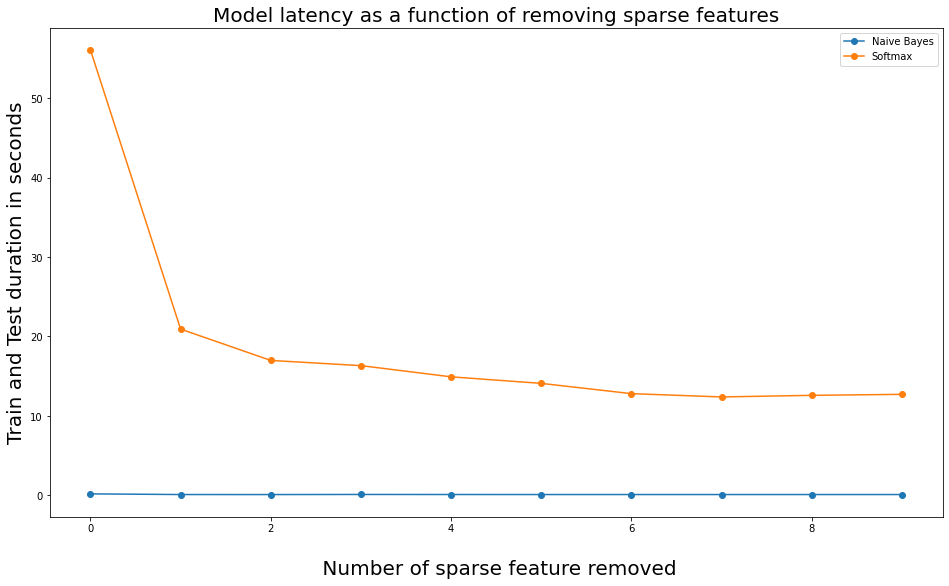

In [ ]:
plt.rcParams['figure.figsize'] = [16, 9]
plt.figure()
plt.plot(remove_feature_below, NB_accuracies, label = 'Naive Bayes', marker='o')
plt.plot(remove_feature_below, Softmax_accuracies, label = 'Softmax', marker='o')
plt.title("Model accuracy as a function of removing sparse features", fontsize=20)
plt.xlabel(" \n Number of sparse feature removed", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.legend(loc='upper right')

plt.figure()
plt.plot(remove_feature_below, NB_durations, label = 'Naive Bayes', marker='o')
plt.plot(remove_feature_below, Softmax_durations, label = 'Softmax', marker='o')
plt.title("Model latency as a function of removing sparse features", fontsize=20)
plt.xlabel(" \n Number of sparse feature removed", fontsize=20)
plt.ylabel("Train and Test duration in seconds", fontsize=20)
plt.legend(loc='upper right')

####Number of classes:
We further want to evaluate how NB compares to softmax with respect to number of classes to be classified

In [ ]:
categories = twenty_train_dataset.target_names

current_catagories = []
current_catagories.append(categories[0])
vectorizer = CountVectorizer()

NB_model = NaiveBayes('Multinomial')            #choose NB with the optimal HP
logisticRegr = LogisticRegression(max_iter=50, C=1, solver = 'liblinear') #choose Softmax with the optimal HP

NB_accuracies, Softmax_accuracies  = [], []
NB_durations, Softmax_durations  = [], []

for i in range(1,len(categories)):
  current_catagories.append(categories[i])
  twenty_train_dataset = fetch_20newsgroups(subset='train', categories=current_catagories)
  twenty_test_dataset = fetch_20newsgroups(subset='test', categories=current_catagories)
  
  X_20_train = vectorizer.fit_transform(twenty_train_dataset.data)
  Y_20_train = twenty_train_dataset.target

  X_20_test = vectorizer.transform(twenty_test_dataset.data)
  Y_20_test = twenty_test_dataset.target
  
  NB_start_time = time.time()
  NB_model.fit(X_20_train, Y_20_train)
  y_prob = NB_model.predict(X_20_test)
  NB_end_time = time.time()
  y_pred = np.argmax(y_prob, 1)
  NB_accuracies.append(evaluate_acc(y_pred,Y_20_test))
  NB_durations.append(NB_end_time - NB_start_time)

  softmax_start_time = time.time()
  logisticRegr.fit(X_20_train, Y_20_train)
  y_pred = logisticRegr.predict(X_20_test)
  softmax_end_time = time.time()
  Softmax_accuracies.append(evaluate_acc(y_pred,Y_20_test))
  Softmax_durations.append(softmax_end_time - softmax_start_time)



/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/2021/mjaved4/Desktop/comp551/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


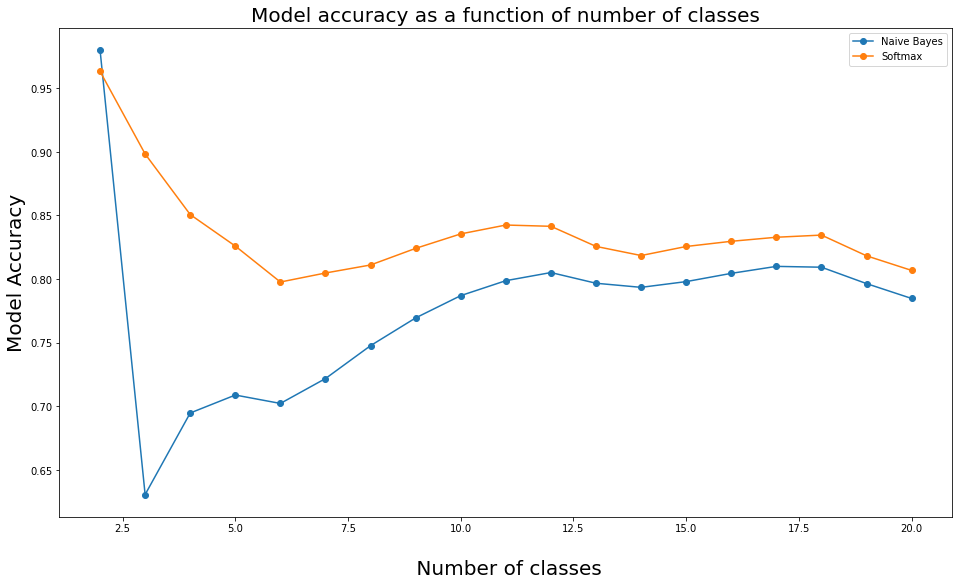

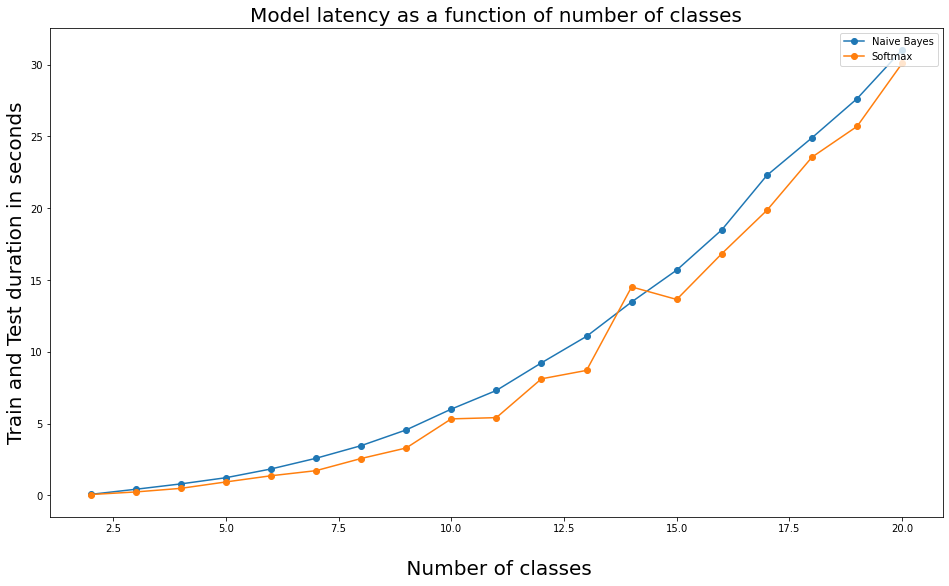

In [ ]:
number_of_classes = list(range(2,len(categories)+1))

plt.rcParams['figure.figsize'] = [16, 9]
plt.figure()
plt.plot(number_of_classes, NB_accuracies, label = 'Naive Bayes', marker='o')
plt.plot(number_of_classes, Softmax_accuracies, label = 'Softmax', marker='o')
plt.title("Model accuracy as a function of number of classes", fontsize=20)
plt.xlabel(" \n Number of classes", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.legend(loc='upper right')

plt.figure()
plt.plot(number_of_classes, NB_durations, label = 'Naive Bayes', marker='o')
plt.plot(number_of_classes, Softmax_durations, label = 'Softmax', marker='o')
plt.title("Model latency as a function of number of classes", fontsize=20)
plt.xlabel(" \n Number of classes", fontsize=20)
plt.ylabel("Train and Test duration in seconds", fontsize=20)
plt.legend(loc='upper right')




### SGD vs NaiveBayes vs Softmax

Naive Bayes test accuracy: 78.60 %
Naive Bayes took: 9.16 seconds
Softmax test accuracy: 81.21 %
Softmax took: 15.25 seconds
SGD test accuracy: 82.62 %
SGD took: 0.56 seconds


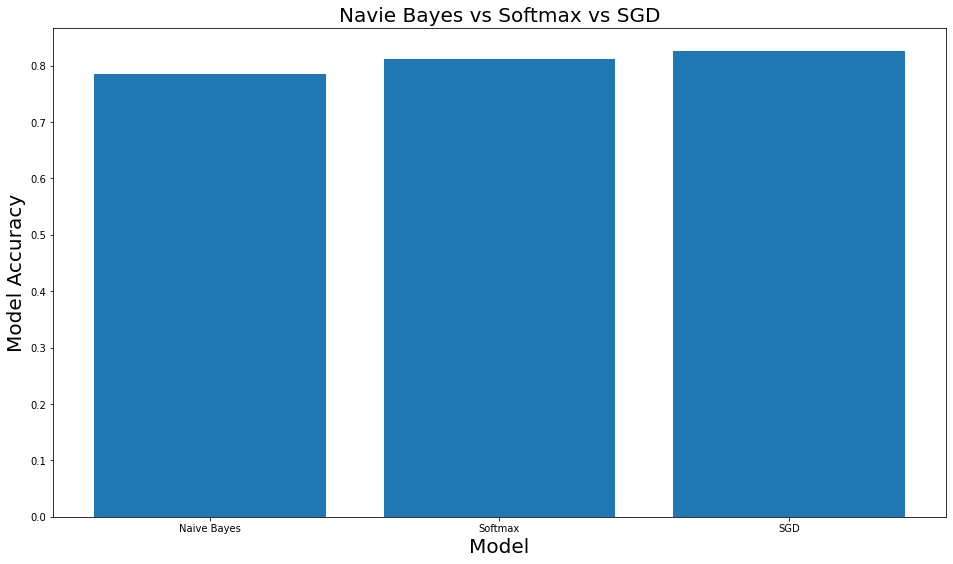

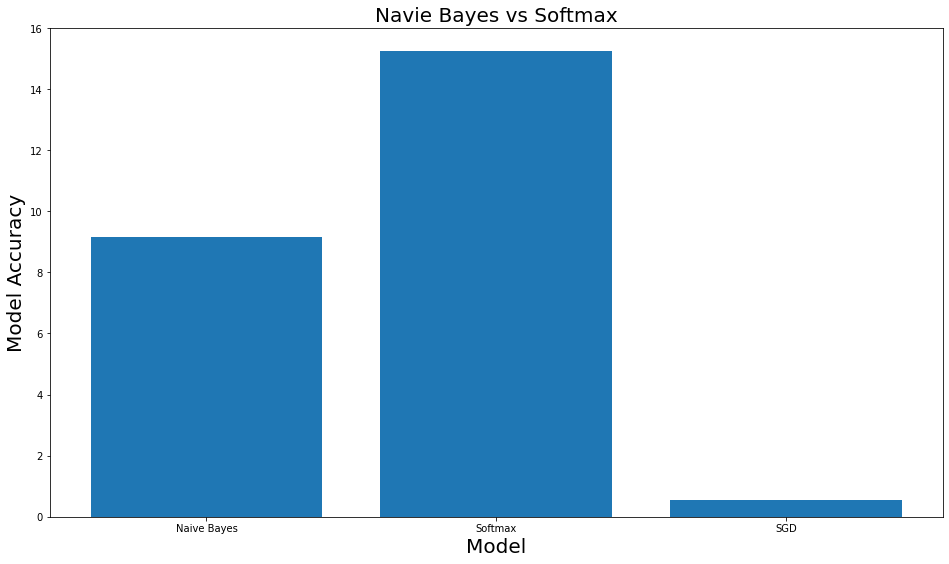

In [ ]:
NB_model = NaiveBayes('Multinomial')             #choose NB with the optimal HP
NB_start_time = time.time()
NB_model.fit(X_20_train_count, Y_20_train)
y_prob = NB_model.predict(X_20_test_count)
NB_end_time = time.time()
y_pred = np.argmax(y_prob, 1)
accuracy_NB = evaluate_acc(y_pred,Y_20_test)
print(f'Naive Bayes test accuracy: {accuracy_NB*100 :.2f} %')
print(f'Naive Bayes took: {NB_end_time - NB_start_time:.2f} seconds')


logisticRegr = LogisticRegression(max_iter=50, C=1, solver = 'liblinear') #choose Softmax with the optimal HP
softmax_start_time = time.time()
logisticRegr.fit(X_20_train_count, Y_20_train)
y_pred = logisticRegr.predict(X_20_test_count)
softmax_end_time = time.time()
accuracy_SM = evaluate_acc(y_pred,Y_20_test)
print(f'Softmax test accuracy: {accuracy_SM*100 :.2f} %')
print(f'Softmax took: {softmax_end_time - softmax_start_time:.2f} seconds')

SGD = SGDClassifier(alpha=0.01)
SGD_start_time = time.time()
SGD.fit(X_20_train_count, Y_20_train)
y_pred = SGD.predict(X_20_test_count)
SGD_end_time = time.time()
accuracy_SGD = evaluate_acc(y_pred,Y_20_test)
print(f'SGD test accuracy: {accuracy_SGD*100 :.2f} %')
print(f'SGD took: {SGD_end_time - SGD_start_time:.2f} seconds')

plt.figure()
plt.bar(["Naive Bayes", "Softmax", "SGD"], [accuracy_NB, accuracy_SM, accuracy_SGD])
plt.title("Navie Bayes vs Softmax vs SGD", fontsize=20)
plt.xlabel("Model", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.show()

plt.figure()
plt.bar(["Naive Bayes", "Softmax", "SGD"], [NB_end_time - NB_start_time, softmax_end_time - softmax_start_time, SGD_end_time - SGD_start_time])
plt.title("Navie Bayes vs Softmax", fontsize=20)
plt.xlabel("Model", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.show()